In [1]:
cd ..

e:\GitHub\ppgc-uff-machine-learning


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data_path = 'data/dataGPS_Floripa.xlsx'
xls = pd.ExcelFile(data_path)
xls.sheet_names

['Abr2019',
 'Ago2019',
 'Dez2018',
 'Fev2019',
 'Jan2019',
 'Jul2019',
 'Jun2019',
 'Mai2019',
 'Mar2019',
 'Nov2018',
 'Out2019',
 'Set2019',
 'Linhas']

Bus routes

In [4]:
routes = xls.parse('Linhas')
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Linha              289 non-null    object        
 1   CodLinhaConsFênix  289 non-null    object        
 2   NomeLinha          289 non-null    object        
 3   TipoTransporte     289 non-null    object        
 4   InícioOperação     288 non-null    datetime64[ns]
 5   FimOperação        22 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 13.7+ KB


In [5]:
routes.head()

,Linha,CodLinhaConsFênix,NomeLinha,TipoTransporte,InícioOperação,FimOperação
0,D365,D-365,Sambaqui Direto,Regular,2003-08-03,NaT
1,1127,1127,Executivo Gaivotas,Executivo,2013-09-16,NaT
2,180,180,TITRI/ UFSC,Regular,2003-08-03,NaT
3,940,940,Canasvieiras/Santo Antônio via Jurerê,Regular,2003-08-03,NaT
4,153,153,Costeira do Pirajubaé,Regular,2004-03-15,NaT


Making a general dataframe

In [6]:
list_of_dfs = []
for sheet_name in xls.sheet_names:
    if sheet_name != 'Linhas':
        list_of_dfs.append(xls.parse(sheet_name))

df = pd.concat(list_of_dfs)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2694360 entries, 0 to 221608
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   DataIni        datetime64[ns]
 1   HoraIni        object        
 2   DataFim        datetime64[ns]
 3   HoraFim        object        
 4   Sentido        object        
 5   Linha          object        
 6   NoVeículo      object        
 7   DuraçãoViagem  object        
 8   TotalGiros     int64         
 9   KmPerc         float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 226.1+ MB


In [24]:
datetime_columns = ['DataIni','DataFim']
time_columns = ['HoraIni','HoraFim']

In [7]:
df.head()

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
0,2019-04-17,10:20:00,2019-04-17,10:32:00,Volta,668,3309,00:12:00,0,7.031
1,2019-04-02,01:52:00,2019-04-02,02:43:00,Ida,300,300,00:51:00,2,24.754
2,2019-04-25,18:49:00,2019-04-25,19:15:00,Ida,186,312,00:26:00,9,12.119
3,2019-04-26,11:14:00,2019-04-26,11:40:00,Ida,631,3309,00:26:00,49,8.720
4,2019-04-26,19:24:00,2019-04-26,19:44:00,Ida,631,34425,00:20:00,11,8.720


In [8]:
df.isnull().sum()

DataIni          0
HoraIni          0
DataFim          0
HoraFim          0
Sentido          0
Linha            0
NoVeículo        0
DuraçãoViagem    0
TotalGiros       0
KmPerc           0
dtype: int64

No null values

In [9]:
df[df.Linha == '668']

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
0,2019-04-17,10:20:00,2019-04-17,10:32:00,Volta,668,3309,00:12:00,0,7.031
590,2019-04-30,10:20:00,2019-04-30,10:32:00,Volta,668,3309,00:12:00,2,7.031
634,2019-04-20,06:50:00,2019-04-20,07:03:00,Volta,668,34431,00:13:00,1,7.031
822,2019-04-27,21:08:00,2019-04-27,21:22:00,Ida,668,3322,00:14:00,3,7.652
845,2019-04-19,12:07:00,2019-04-19,12:21:00,Volta,668,3314,00:14:00,3,7.031
...,...,...,...,...,...,...,...,...,...,...
220172,2019-09-28,14:59:00,2019-09-28,14:59:00,Volta,668,34420,00:00:00,0,7.031
220453,2019-09-11,08:50:00,2019-09-11,09:04:00,Volta,668,34422,00:14:00,4,7.031
221340,2019-09-20,17:18:00,2019-09-20,17:33:00,Ida,668,50336,00:15:00,7,7.652
221483,2019-09-09,12:15:00,2019-09-09,12:29:00,Ida,668,3305,00:14:00,3,7.652


Converting DuraçãoViagem to an integer column in minutes and hour

In [10]:
import re
df['DuracaoMinutes'] = df['DuraçãoViagem'].apply(lambda duracao: int(re.findall(':\d{2}:', str(duracao))[0].strip(':')) + 60*int(re.findall('\d{2}:', str(duracao))[0].strip(':')))
df.head()

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DuracaoMinutes
0,2019-04-17,10:20:00,2019-04-17,10:32:00,Volta,668,3309,00:12:00,0,7.031,12
1,2019-04-02,01:52:00,2019-04-02,02:43:00,Ida,300,300,00:51:00,2,24.754,51
2,2019-04-25,18:49:00,2019-04-25,19:15:00,Ida,186,312,00:26:00,9,12.119,26
3,2019-04-26,11:14:00,2019-04-26,11:40:00,Ida,631,3309,00:26:00,49,8.720,26
4,2019-04-26,19:24:00,2019-04-26,19:44:00,Ida,631,34425,00:20:00,11,8.720,20


In [11]:
df[df.DuracaoMinutes >= 60].shape[0]*100/df.shape[0]

9.898565893199127

Almost 10% of trips takes at least one hour

In [12]:
trip_length = 120
df[df['DuracaoMinutes'] >= trip_length].shape[0]*100/df.shape[0]

0.1657536483617631

Very few trips takes at least 120 minutes, let's see if there are some routes where this duration isn't an exception

In [13]:
gt_duration = pd.crosstab(df[df['DuracaoMinutes'] >= trip_length]['Linha'], 'frequency').reset_index()
gt_duration.sort_values(by=['frequency'], ascending=False)

col_0,Linha,frequency
55,2120,267
13,1125,204
151,840,204
24,138,196
58,221,170
...,...,...
46,182,1
51,191,1
137,664,1
97,365V,1


In [14]:
gt_duration['totalTravels'] = gt_duration['Linha'].apply(lambda linha: df[df['Linha'] == linha].shape[0])
gt_duration['perctgt_duration'] = gt_duration['frequency']*100/gt_duration['totalTravels']
gt_duration.sort_values(by=['perctgt_duration'], ascending=False)

col_0,Linha,frequency,totalTravels,perctgt_duration
3,109,4,32,12.500000
101,4121,41,1017,4.031465
168,D267,42,1369,3.067933
164,D174,15,519,2.890173
56,2123,15,533,2.814259
...,...,...,...,...
34,168,1,12788,0.007820
137,664,1,13425,0.007449
69,268,1,15990,0.006254
74,276,2,34775,0.005751


In [15]:
df['Linha'].unique().size

230

It seems that, except Linha 109, trips that take at least 120 minutes are exceptions

However, some of these trips might have an usual duration a little less than 120 minutes, let's analyze it

In [16]:
gt_duration['gt_90_lt_120'] = gt_duration['Linha'].apply(lambda linha: df[(df['Linha'] == linha) & (df['DuracaoMinutes'] > 90) & (df['DuracaoMinutes'] < 120)].shape[0])
gt_duration['perct_gt_90'] = gt_duration['gt_90_lt_120']*100/gt_duration['totalTravels']
gt_duration.sort_values(by=['perct_gt_90'], ascending=False)

col_0,Linha,frequency,totalTravels,perctgt_duration,gt_90_lt_120,perct_gt_90
168,D267,42,1369,3.067933,1042,76.113952
167,D266,11,797,1.380176,391,49.058971
166,D264,18,1047,1.719198,474,45.272206
13,1125,204,16643,1.225741,4232,25.428108
3,109,4,32,12.500000,7,21.875000
...,...,...,...,...,...,...
97,365V,1,2749,0.036377,0,0.000000
110,463,1,10586,0.009446,0,0.000000
46,182,1,2588,0.038640,0,0.000000
61,260,3,32602,0.009202,0,0.000000


In [17]:
gt_duration[gt_duration['perct_gt_90'] >= 20].shape[0]

5

Very few routes consistenly take more than 90 minutes to complete its trip. It's time to remove the outliers from the data

In [20]:
def outliers_idx(df, feature):
    outliers = []
    
    quartile_1 = np.percentile(df[feature], 25)
    quartile_3 = np.percentile(df[feature], 75)

    step = 1.5 * (quartile_3 - quartile_1)
    
    feature_outliers = df[~((df[feature] >= quartile_1 - step) & (df[feature] <= quartile_3 + step))]
    
    outliers.extend(list(feature_outliers.index.values))
    
    return outliers

In [22]:
print(f"Dataset before outliers removal: {df.shape}")
outliers = outliers_idx(df, 'DuracaoMinutes')
df = df.drop(df.index[outliers]).reset_index(drop=True)
print(f"Dataset after outliers removal: {df.shape}")

Dataset before outliers removal: (2694360, 11)
Dataset after outliers removal: (2615496, 11)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615496 entries, 0 to 2615495
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DataIni         object 
 1   HoraIni         object 
 2   DataFim         object 
 3   HoraFim         object 
 4   Sentido         object 
 5   Linha           object 
 6   NoVeículo       object 
 7   DuraçãoViagem   object 
 8   TotalGiros      int64  
 9   KmPerc          float64
 10  DuracaoMinutes  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 219.5+ MB


In [32]:
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], format="%Y-%m-%d")
for col in time_columns:
    df[col] = pd.to_datetime(df[col], format="%H:%M:%S").dt.time
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615496 entries, 0 to 2615495
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DataIni         datetime64[ns]
 1   HoraIni         object        
 2   DataFim         datetime64[ns]
 3   HoraFim         object        
 4   Sentido         object        
 5   Linha           object        
 6   NoVeículo       object        
 7   DuraçãoViagem   object        
 8   TotalGiros      int64         
 9   KmPerc          float64       
 10  DuracaoMinutes  int64         
 11  AvgSpeed        float64       
 12  PassPerKm       float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 259.4+ MB
None


,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DuracaoMinutes,AvgSpeed,PassPerKm
0,2019-04-17,10:20:00,2019-04-17,10:32:00,Volta,668,3309,00:12:00,0,7.031,12,35.155000,0.000000
1,2019-04-02,01:52:00,2019-04-02,02:43:00,Ida,300,300,00:51:00,2,24.754,51,29.122353,0.080795
2,2019-04-25,18:49:00,2019-04-25,19:15:00,Ida,186,312,00:26:00,9,12.119,26,27.966923,0.742636
3,2019-04-26,11:14:00,2019-04-26,11:40:00,Ida,631,3309,00:26:00,49,8.720,26,20.123077,5.619266
4,2019-04-26,19:24:00,2019-04-26,19:44:00,Ida,631,34425,00:20:00,11,8.720,20,26.160000,1.261468


In [36]:
df['HourStart'] = pd.to_datetime(df['HoraIni'], format="%H:%M:%S").dt.hour
df['HourEnd'] = pd.to_datetime(df['HoraFim'], format="%H:%M:%S").dt.hour
df.head()

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DuracaoMinutes,AvgSpeed,PassPerKm,HourStart,HourEnd
0,2019-04-17,10:20:00,2019-04-17,10:32:00,Volta,668,3309,00:12:00,0,7.031,12,35.155000,0.000000,10,10
1,2019-04-02,01:52:00,2019-04-02,02:43:00,Ida,300,300,00:51:00,2,24.754,51,29.122353,0.080795,1,2
2,2019-04-25,18:49:00,2019-04-25,19:15:00,Ida,186,312,00:26:00,9,12.119,26,27.966923,0.742636,18,19
3,2019-04-26,11:14:00,2019-04-26,11:40:00,Ida,631,3309,00:26:00,49,8.720,26,20.123077,5.619266,11,11
4,2019-04-26,19:24:00,2019-04-26,19:44:00,Ida,631,34425,00:20:00,11,8.720,20,26.160000,1.261468,19,19


In [51]:
numeric_cols = ['TotalGiros','KmPerc','DuracaoMinutes','HourStart']

In [90]:
aggreg = {
    'Sentido':'count',
    'TotalGiros':'sum',
    'DuracaoMinutes':'mean',
    'KmPerc':'mean'
}

info_route = df.groupby(['Linha'], as_index=False).agg(aggreg).dropna().rename(columns={"Sentido":"NumTrips","DuracaoMinutes":"MeanDuracao"})
info_route['PassPerTrip'] = info_route['TotalGiros']/info_route['NumTrips']
info_route.sort_values(by=['PassPerTrip'], ascending=False)

,Linha,NumTrips,TotalGiros,MeanDuracao,KmPerc,PassPerTrip
212,D260,251,14430,68.529880,34.176873,57.490040
216,D360,531,29968,62.073446,22.144000,56.436911
217,D360V,355,19784,61.780282,37.909699,55.729577
229,M941,920,50098,49.836957,21.298841,54.454348
94,284,1004,53437,45.347610,15.984287,53.224104
...,...,...,...,...,...,...
158,604,1,0,0.000000,22.469000,0.000000
148,560,4,0,0.500000,11.880000,0.000000
104,310,1,0,58.000000,18.220000,0.000000
63,187,13,0,0.538462,4.392077,0.000000


In [112]:
routes_most_ppt = info_route.sort_values(by=['PassPerTrip'], ascending=False).iloc[:5].Linha.unique()
routes_most_ppt

array(['D260', 'D360', 'D360V', 'M941', '284'], dtype=object)

In [67]:
aggreg = {
    'TotalGiros':'mean',
    'DuracaoMinutes':'mean',
    'KmPerc':'mean'
}

info_hour = df.groupby(['HourStart'], as_index=False).agg(aggreg)
info_hour.sort_values(by=['TotalGiros'], ascending=False)

,HourStart,TotalGiros,DuracaoMinutes,KmPerc
16,16,23.727759,34.515598,12.843208
6,6,23.265377,30.210435,12.891135
7,7,22.063471,32.702328,12.639573
4,4,21.936697,33.076552,17.940496
17,17,21.675957,34.899102,12.264827
11,11,21.596865,33.252440,13.095177
5,5,21.160686,26.911132,12.736849
12,12,20.777224,32.525566,12.654728
15,15,20.637479,33.079057,12.704847
14,14,17.088852,32.379132,12.818944


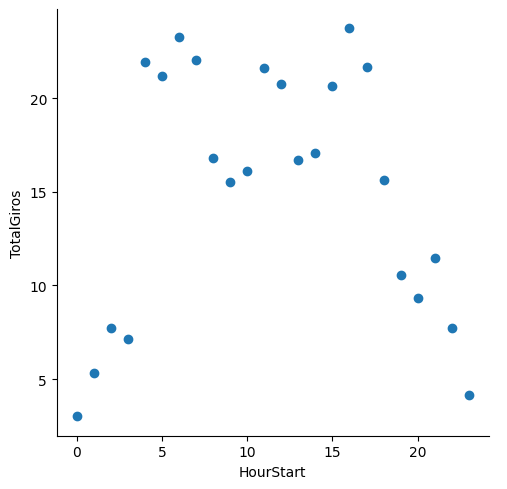

In [68]:
sns.FacetGrid(info_hour, height=5).map(plt.scatter, "HourStart", "TotalGiros").add_legend()
plt.show()

As expected, the busiest time is between 6am and 6pm

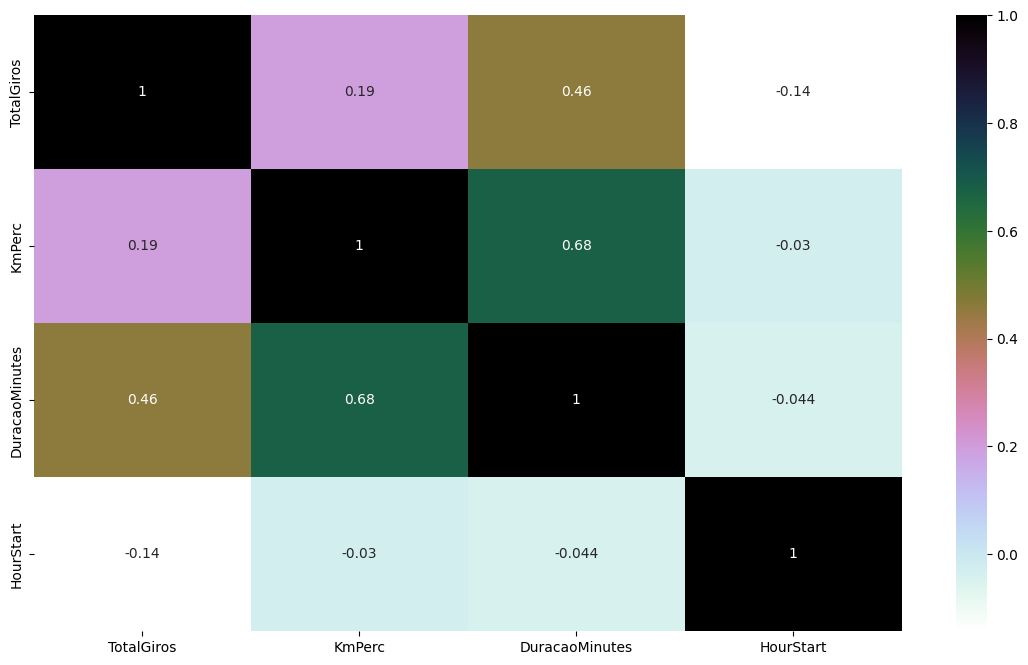

In [50]:
plt.figure(figsize=(14,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='cubehelix_r')
plt.show()

There is a clear correlation between KmPerc and DuracaoMinutes, but there still is some correlation between TotalGiros and DuracaoMinutes, lets visualize it

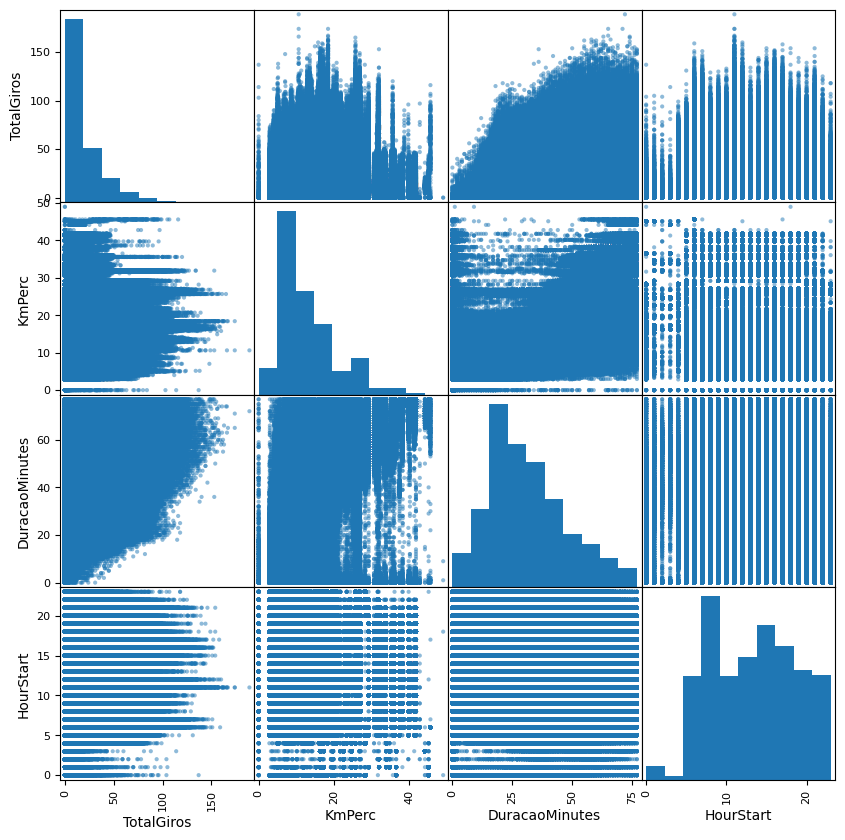

In [52]:
pd.plotting.scatter_matrix(df[numeric_cols], figsize=(10,10))
plt.show()

Makes sense that, the longer the trip, more people will get on the bus. However, just as the correlation coefficient showed, this relation isn't exatcly linear.

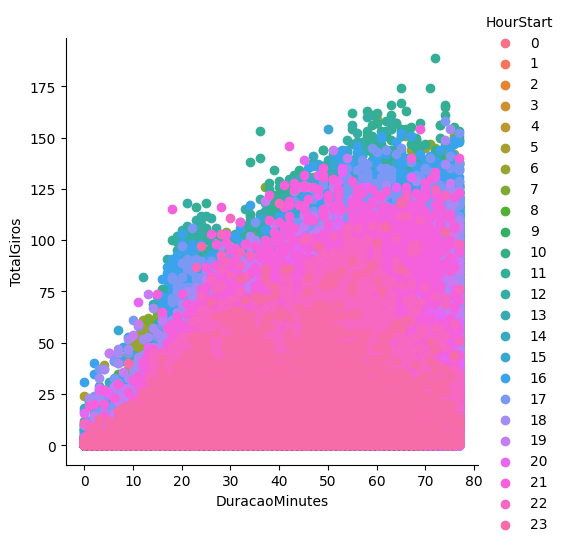

In [62]:
sns.FacetGrid(df[numeric_cols], hue="HourStart", height=5).map(plt.scatter, "DuracaoMinutes", "TotalGiros").add_legend()
plt.show()

And just as we saw before, later hours have lest TotalGiros, regardless of trip duration.

Let's group our data by date and route so that we can take a temporal approach

In [115]:
aggreg = {
    "Sentido":"count",
    "TotalGiros":"sum",
    "DuracaoMinutes":"mean"
}
data_route = df.groupby(["DataIni","Linha"]).agg(aggreg).rename(columns={"Sentido":"NumTrips","DuracaoMinutes":"MeanDuracao"})
data_route['PassPerTrip'] = data_route['TotalGiros']/data_route['NumTrips']
data_route['Linha']=data_route.index.get_level_values(1)
data_route.info()
data_route.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 62619 entries, (Timestamp('2018-11-01 00:00:00'), '101') to (Timestamp('2019-11-01 00:00:00'), 'M273')
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NumTrips     62619 non-null  int64  
 1   TotalGiros   62619 non-null  int64  
 2   MeanDuracao  62619 non-null  float64
 3   PassPerTrip  62619 non-null  float64
 4   Linha        62619 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ MB


NumTrips  TotalGiros  MeanDuracao  PassPerTrip Linha
DataIni    Linha                                                      
2018-11-01 101          16         129    28.375000     8.062500   101
           104          30         763    40.266667    25.433333   104
           110          64           0    22.921875     0.000000   110
           1112         38         317    38.684211     8.342105  1112
           1113         54         654    36.388889    12.111111  1113

In [116]:
data_route[data_route.TotalGiros == 0].shape[0]*100/data_route.shape[0]

2.7196218400166083

Almost 3% of daily bus routes doesn't have any recorded passenger 

In [117]:
route_no_pass = data_route[data_route.TotalGiros == 0].Linha.unique()
data_route = data_route[data_route.TotalGiros > 0]

Let's start analyzing the data as a time series

I will start by working on the five routes with the highest average number of passengers per trip

In [123]:
sample_data = data_route[data_route.Linha.isin(routes_most_ppt)]
sample_data = sample_data.drop(['Linha'],axis=1)
sample_data = sample_data.reset_index(level='Linha')

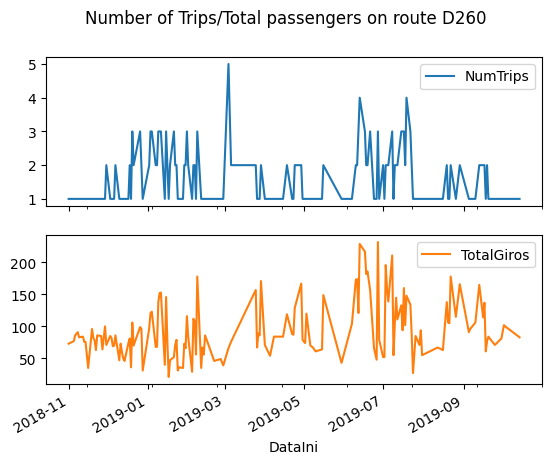

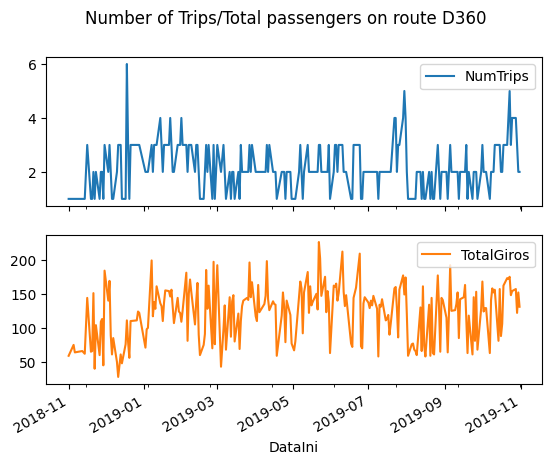

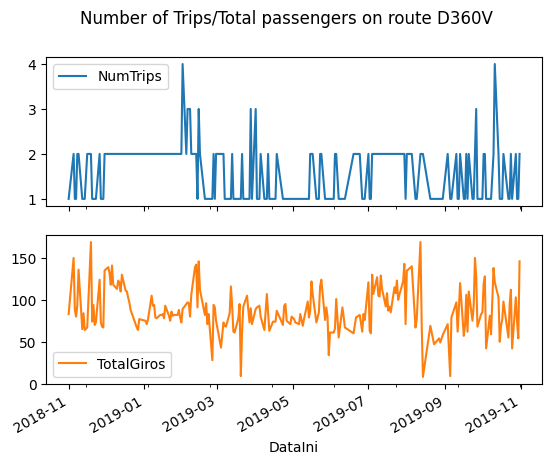

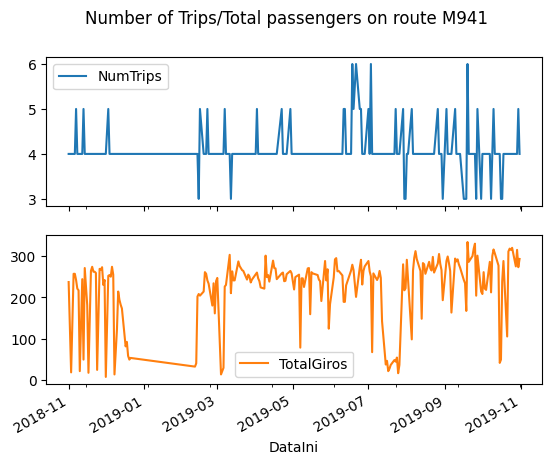

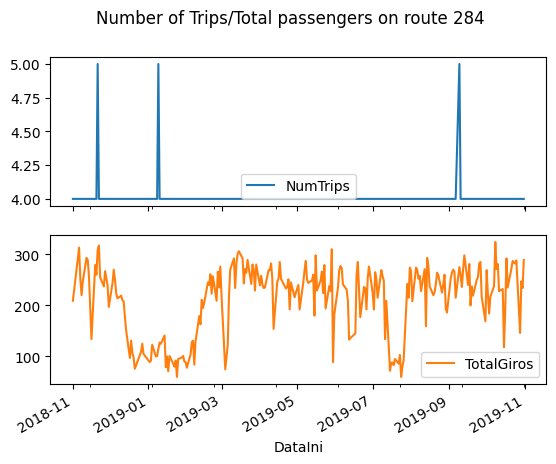

In [128]:
for route in routes_most_ppt:
    sample_data[sample_data.Linha == route][['NumTrips', 'TotalGiros']].plot(title=f'Number of Trips/Total passengers on route {route}', subplots=True)

In [94]:
ts = df.set_index('DataIni')
ts = ts.drop(['DataFim','HoraFim','NoVeículo','HourEnd','AvgSpeed'],axis=1)
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2615496 entries, 2019-04-17 to 2019-09-25
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   HoraIni         object 
 1   Sentido         object 
 2   Linha           object 
 3   DuraçãoViagem   object 
 4   TotalGiros      int64  
 5   KmPerc          float64
 6   DuracaoMinutes  int64  
 7   PassPerKm       float64
 8   HourStart       int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 189.6+ MB


,HoraIni,Sentido,Linha,DuraçãoViagem,TotalGiros,KmPerc,DuracaoMinutes,PassPerKm,HourStart
DataIni,,,,,,,,,
2019-04-17,10:20:00,Volta,668,00:12:00,0,7.031,12,0.000000,10
2019-04-02,01:52:00,Ida,300,00:51:00,2,24.754,51,0.080795,1
2019-04-25,18:49:00,Ida,186,00:26:00,9,12.119,26,0.742636,18
2019-04-26,11:14:00,Ida,631,00:26:00,49,8.720,26,5.619266,11
2019-04-26,19:24:00,Ida,631,00:20:00,11,8.720,20,1.261468,19


In [ ]:
ts[['Close', 'Volume']].plot(title='Google Open/Close Stock Price', subplots=True)

plt.show()